In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('titanic_train.csv')

In [4]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna('N',inplace=True)
df['Embarked'].fillna('N',inplace=True)

In [9]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [15]:
df['Cabin'] = df['Cabin'].str[:1]

In [16]:
df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [18]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

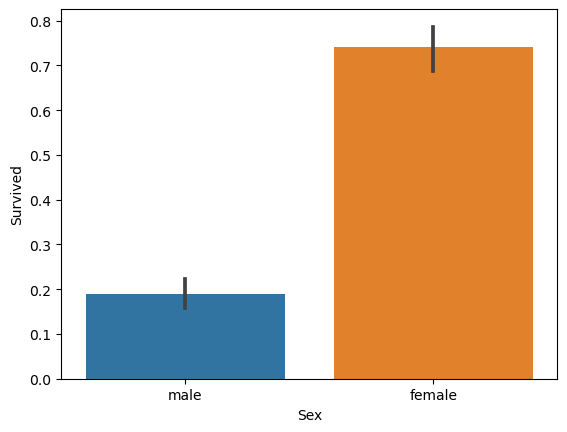

In [19]:
sns.barplot(x='Sex',y='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

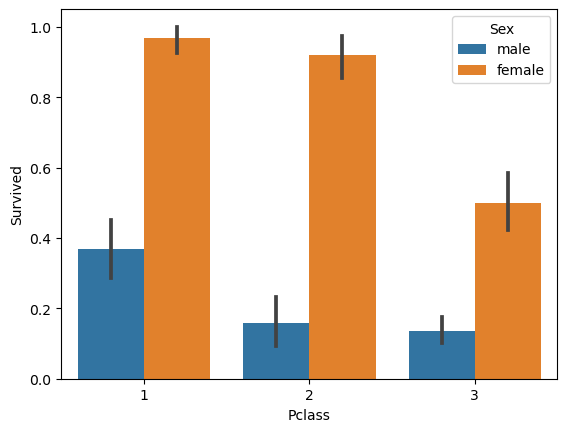

In [20]:
sns.barplot(x='Pclass',hue='Sex',y='Survived',data=df)

In [23]:
def get_category(age):
    cat = ''
    if age <= -1 :cat = 'Unknown'
    elif age <= 5:cat = 'Baby'
    elif age <= 12:cat = 'Child'
    elif age <= 18:cat = 'Teenager'
    elif age <= 25:cat = 'Student'
    elif age <= 35:cat = 'Young Adult'
    elif age <= 60:cat = 'Adult'
    else: cat = 'Elderly'
    return cat

<Axes: xlabel='Age_cat', ylabel='Survived'>

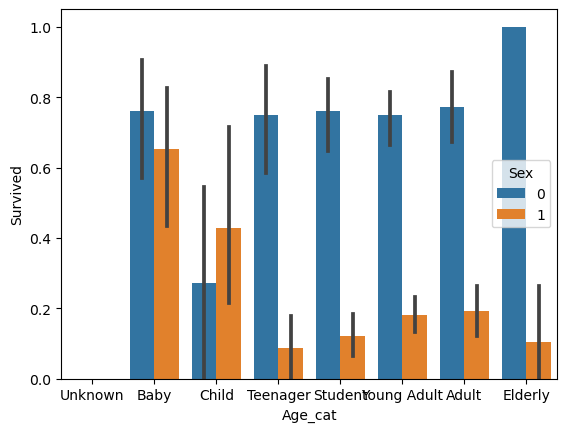

In [34]:
df['Age_cat'] = df['Age'].apply(get_category)

order_list=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
sns.barplot(x='Age_cat',
            y='Survived',
            data=df,
            hue='Sex',order=order_list)

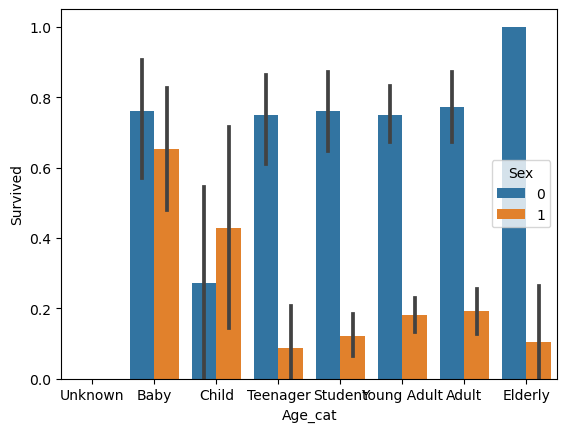

In [31]:
df.drop(columns='Age_cat',inplace=True)

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
def encode_features(df):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df        

In [33]:
df = encode_features(df)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0


In [35]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'],
            inplace=True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [36]:
df = pd.read_csv('titanic_train.csv')
y = df['Survived']
x = df.drop(columns='Survived')
x = transform_features(x)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=11)

In [53]:
y_train.value_counts(),y_test.value_counts()

(0    431
 1    281
 Name: Survived, dtype: int64,
 0    118
 1     61
 Name: Survived, dtype: int64)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [47]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=200)

dt_clf.fit(x_train,y_train)
rf_clf.fit(x_train,y_train)
lr_clf.fit(x_train,y_train)

dt_pred = dt_clf.predict(x_test)
rf_pred = rf_clf.predict(x_test)
lr_pred = lr_clf.predict(x_test)

print(f'{dt_clf.__class__.__name__} 정확도 : {accuracy_score(y_test,dt_pred)}')
print(f'{rf_clf.__class__.__name__} 정확도 : {accuracy_score(y_test,rf_pred)}')
print(f'{lr_clf.__class__.__name__} 정확도 : {accuracy_score(y_test,lr_pred)}')

DecisionTreeClassifier 정확도 : 0.7877094972067039
RandomForestClassifier 정확도 : 0.8547486033519553
LogisticRegression 정확도 : 0.8491620111731844


In [48]:
from sklearn.model_selection import KFold

In [49]:
def exec_kfold(x,clf,folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    for iter_count,(train_index,test_index) in enumerate(kfold.split(x)):
        x_train,x_test = x.values[train_index],x.values[test_index]
        y_train,y_test = y.values[train_index],y.values[test_index]
        clf.fit(x_train,y_train)
        pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test,pred)
        scores.append(accuracy)
        print(f'교차검증 {iter_count} 정확도: {accuracy}')
    print(f'평균 정확도 :{np.mean(scores):.4f}')

exec_kfold(x,dt_clf)
# DecisionTreeClassifier 정확도 : 0.7877094972067039

교차검증 0 정확도: 0.7541899441340782
교차검증 1 정확도: 0.7808988764044944
교차검증 2 정확도: 0.7865168539325843
교차검증 3 정확도: 0.7696629213483146
교차검증 4 정확도: 0.8202247191011236
평균 정확도 :0.7823


In [50]:
exec_kfold(x,rf_clf)
# RandomForestClassifier 정확도 : 0.8547486033519553

교차검증 0 정확도: 0.7932960893854749
교차검증 1 정확도: 0.8089887640449438
교차검증 2 정확도: 0.8370786516853933
교차검증 3 정확도: 0.7752808988764045
교차검증 4 정확도: 0.8595505617977528
평균 정확도 :0.8148


In [51]:
exec_kfold(x,lr_clf)
# LogisticRegression 정확도 : 0.8491620111731844

교차검증 0 정확도: 0.8044692737430168
교차검증 1 정확도: 0.7808988764044944
교차검증 2 정확도: 0.7752808988764045
교차검증 3 정확도: 0.7528089887640449
교차검증 4 정확도: 0.8202247191011236
평균 정확도 :0.7867


In [54]:
from sklearn.model_selection import cross_val_score

In [59]:
%%time
dt_s = cross_val_score(dt_clf,x,y,cv=5)
dt_s,np.mean(dt_s)
# DecisionTreeClassifier 정확도 : 0.7877094972067039
# 평균 정확도 :0.7823

CPU times: total: 31.2 ms
Wall time: 32.6 ms


(array([0.74301676, 0.7752809 , 0.79213483, 0.78651685, 0.84269663]),
 0.7879291946519366)

In [60]:
%%time
rf_s = cross_val_score(rf_clf,x,y,cv=5)
rf_s,np.mean(rf_s)
# RandomForestClassifier 정확도 : 0.8547486033519553
# 평균 정확도 :0.8148

CPU times: total: 781 ms
Wall time: 807 ms


(array([0.79329609, 0.79775281, 0.84831461, 0.76404494, 0.86516854]),
 0.8137153976523758)

In [61]:
%%time
lr_s = cross_val_score(lr_clf,x,y,cv=5)
lr_s,np.mean(lr_s)
# LogisticRegression 정확도 : 0.8491620111731844
# 평균 정확도 :0.7867

CPU times: total: 125 ms
Wall time: 129 ms


(array([0.79329609, 0.78089888, 0.78089888, 0.76966292, 0.80898876]),
 0.7867491055175444)

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
%%time
param = {
     'max_depth':[2,3,5,10],
     'min_samples_split':[2,3,5],
     'min_samples_leaf':[1,5,8],
}
grid_dtclf = GridSearchCV(dt_clf,
                          param_grid=param,
                          scoring='accuracy',
                          cv=5)
grid_dtclf.fit(x_train,y_train)
print('최적 하이퍼 파라미터:',grid_dtclf.best_params_)
print('최고 정확도:',grid_dtclf.best_score_)

최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
최고 정확도: 0.7991825076332119
CPU times: total: 656 ms
Wall time: 718 ms


In [64]:
best_dtclf = grid_dtclf.best_estimator_
pred = best_dtclf.predict(x_test)
accuracy_score(y_test,pred)

0.8715083798882681

In [65]:
%%time
param = {
     'max_depth':[2,3,5,10],
     'min_samples_split':[2,3,5],
     'min_samples_leaf':[1,5,8],
     'n_estimators':[100,200]
}
grid_rfclf = GridSearchCV(rf_clf,
                          param_grid=param,
                          scoring='accuracy',
                          cv=5)
grid_rfclf.fit(x_train,y_train)
print('최적 하이퍼 파라미터:',grid_rfclf.best_params_)
print('최고 정확도:',grid_rfclf.best_score_)

best_rfclf = grid_rfclf.best_estimator_
pred = best_rfclf.predict(x_test)
accuracy_score(y_test,pred)

최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
최고 정확도: 0.8145966709346991
CPU times: total: 1min 8s
Wall time: 1min 10s


0.88268156424581